# Condición de los equipos vendidos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import inline as inline

%matplotlib inline

pd.set_option('display.width', 400)
pd.set_option('display.max_columns', 23)
pd.set_option('display.max_rows', 100)

pd.options.mode.chained_assignment = None

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

df = pd.read_csv('events.csv', low_memory = False)


In [2]:
df_conversions = df.loc[df['event'] == 'conversion', : ]
df_conversions = df_conversions[['timestamp', 'event', 'condition', 'model']]
df_conversions.head()

,timestamp,event,condition,model
220,2018-03-20 17:46:12,conversion,Muito Bom,Motorola Moto X2
2282,2018-04-26 22:28:53,conversion,Muito Bom,Samsung Galaxy Core Plus Duos TV
2547,2018-06-10 14:37:50,conversion,Muito Bom,Samsung Galaxy S6 Flat
4245,2018-03-16 13:50:25,conversion,Bom,iPhone 5s
6985,2018-02-09 22:07:07,conversion,Bom,Samsung Galaxy J5


In [3]:
df_conversions['date'] = pd.to_datetime(df_conversions['timestamp'])
df_conversions['month'] = df_conversions['date'].dt.month
df_conversions['day'] = df_conversions['date'].dt.weekday_name
ct = pd.crosstab(df_conversions.month, df_conversions.day)
ct.head(10)

day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
month,,,,,,,
1,7,9,4,6,6,13,18
2,11,11,12,3,20,11,6
3,38,41,34,26,36,57,33
4,51,58,25,39,46,54,43
5,49,54,21,23,70,62,72
6,19,11,10,6,22,18,17


In [4]:
df_conversions['counter'] = 1
used_articles = df_conversions.groupby('model')
used_articles = used_articles['counter'].sum()
used_articles = used_articles.sort_values(ascending = False)
used_articles = used_articles.head(10)
articles_conditions = df_conversions.loc[df_conversions['condition'].isin(['Bom', 'Excelente', 'Muito Bom', 'Novo']), : ]
crosstab_aux = articles_conditions.loc[df_conversions['model'].isin(used_articles.index), :]

In [5]:
model_condition = pd.crosstab(crosstab_aux.condition, crosstab_aux.model)
model_condition.head()

model,Motorola Moto G3 4G,Motorola Moto G4 Plus,Samsung Galaxy A5,Samsung Galaxy J5,Samsung Galaxy J7,Samsung Galaxy S6 Flat,iPhone 5c,iPhone 5s,iPhone 6,iPhone 6S
condition,,,,,,,,,,
Bom,24,11,13,55,9,29,28,34,26,12
Excelente,2,7,1,7,6,4,2,12,12,12
Muito Bom,4,12,13,26,13,6,3,29,23,12


Text(88,0.5,'Condición')

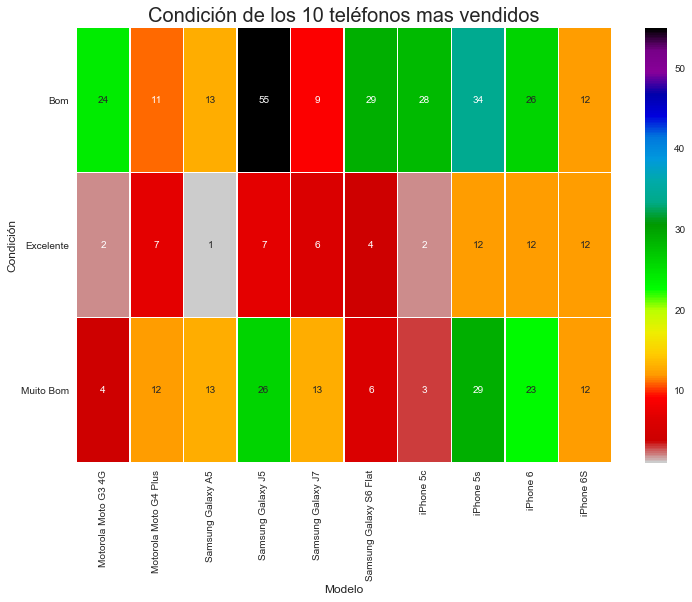

In [7]:
plt.subplots(figsize=(12,8))
grafico_modelo_condicion=sns.heatmap(model_condition,linewidths=.5,fmt="d",annot=True,cmap="nipy_spectral_r")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
grafico_modelo_condicion.set_title("Condición de los 10 teléfonos mas vendidos",fontsize=20)
grafico_modelo_condicion.set_xlabel("Modelo",fontsize=12)
grafico_modelo_condicion.set_ylabel("Condición",fontsize=12)